<a href="https://colab.research.google.com/github/orital04/tinyProject2OriTal/blob/main/tinyProject1LinearRegressionPandas_Ori_Tal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
import io
url = "insurance.csv"
df = pd.read_csv(io.BytesIO(uploaded[url]))


In [ ]:
print(df.shape)
df

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'])

In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [ ]:
df.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#what and where I need to check 
X = df['smoker_yes'].values
y = df['charges'].values

In [ ]:
print(X.shape)
print(y.shape)

(1338,)
(1338,)


In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
print(X.shape)
print(y.shape)

(1338, 1)
(1338, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(896, 1)
(896, 1)
(442, 1)
(442, 1)


In [ ]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()


# Train the model using training data sets
LR_model.fit(X_train,y_train)


# Predict on the test data
y_pred=LR_model.predict(X_test)

In [ ]:
m = LR_model.coef_
b = LR_model.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, b:" , b) 

Estimated model slope, m: [[23206.21220785]]
Estimated model intercept, b: (array([8510.52765284]),)


In [ ]:
LR_model.predict(X)[0:5]

array([[31716.73986069],
       [ 8510.52765284],
       [ 8510.52765284],
       [ 8510.52765284],
       [ 8510.52765284]])

In [ ]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.6399


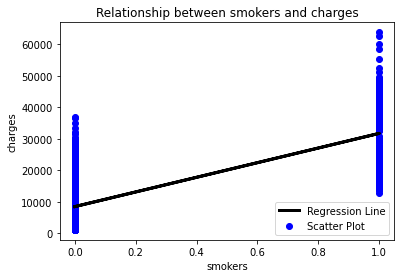

In [ ]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between smokers and charges')
plt.ylabel('charges')
plt.xlabel('smokers')
plt.legend(loc=4)
plt.show()

In [ ]:
#what and where I need to check 
X = df[["smoker_yes", "age", "bmi", "children", "region_southeast", "region_southwest", "region_northeast"]].values
y = df["charges"].values

In [ ]:
y = y.reshape(-1,1)
y.shape

(1338, 1)

In [ ]:
print(X.shape)
print(y.shape)

(1338, 7)
(1338, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(896, 7)
(896, 1)
(442, 7)
(442, 1)


In [ ]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()


# Train the model using training data sets
LR_model.fit(X_train,y_train)


# Predict on the test data
y_pred=LR_model.predict(X_test)

In [ ]:
m = LR_model.coef_
b = LR_model.intercept_,
print("Estimated model slope, m:" , m)
print("Estimated model intercept, b:" , b) 

Estimated model slope, m: [[23706.57895723   261.52514608   347.32933437   372.7856855
   -556.1907527   -470.28456116   335.75565472]]
Estimated model intercept, b: (array([-12706.68521578]),)


In [ ]:
LR_model.predict(X)[0:5]

array([[25189.07538456],
       [ 3546.67396795],
       [ 6640.05321226],
       [ 3809.75714153],
       [ 5692.99063517]])

In [ ]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.7608


<div dir=rtl>
בפרויקטון הזה ניסיתי למצוא את המשתנים שעל פי הם חברת הביטוח לנדא תוכל לנסות להעריך את ההצאות הרפואיות למבוטח באופן המדויק ביותר.
תחילה בשלב א' בניתי את המודל עבור חיזוי של תכונה אחת בודדת, על ידי שימוש ברגרסיה ליניארית פשוטה. עשיתי יבוא של ספריות בהן השתמשתי במהלך הפרויקטון והצגתי נתונים כלליים על המידע שיש לי. היה צורך להפוך את המשתנים הקטגוריאליים, אשר מיוצגים במקור כסוג object, לסוג אשר אוכל להפעיל עליו את החיזוי. עשיתי זאת בעזרת הפעולה get_dummies, והפעלתי אותה על המשתנים הקטגוריאליים שלי - sex, smoker, region. לאחר מכן היה צורך לסדר את הshape של המשתנים בשביל שאוכל לעבוד איתם בנוחות, ואת זה עשיתי באמצעות reshape. 
מצאתי שR2 הגדול ביותר היה כשאני חוזה על פי smoker(yes/no), והוא 0.6399, משמע על כאלה שמעשנים או לא מעשנים יש את החיזוי הכי טוב עבור הוצאת העלויות שלהם.
בשלב ב', ניסיתי לחזות בעזרת מספר משתנים , וR2 הגדול ביותר אליו הגעתי הוא של 0.7608, עבור הקטגוריות "smoker_yes", "age", "bmi", "children",  region_southeast", "region_southwest", "region_northeast.
ההסבר לכך שהR2 גדול יותר כשעושים בעזרת מספר משתנים הוא שקל יותר לשער (לעשות פרדיקציה) על מספר נתונים שכן כך ניתן לסווג את הנתונים באופן קל יותר - ישנה סכמה (תבנית) הרבה יותר ברורה (לרוב, אם בוחרים במשתנים המתאימים), אשר לפיה ניתן לחזות בשיעור גבוה יחסית את הוצאות הביטוח, משמע לקבל הערכה הרבה יותר מדויקת מאשר אם עושים את הפרידקציה על משתנה אחד בלבד, שכן לרוב אותו משתנה מסוים לא מצליח לספק תמונה מספיק רחבה וברורה, זאת אומרת אין סכמה ברורה בעבור כל/מרבית הנתונים לפיה אם משתנה אחד מתקיים אז בהכרח ההוצאות יהיו גבוהות או להיפך, כך שזה לא משהו אשר ניתן לעשות עליו פרדיקציה אשר תהיה בעלת תוצאות גבוהות דיו בעבור חיזוי. 
</div>
